# 1-dimensional continuous data BO test using BayBE

In [90]:
from baybe.targets import NumericalTarget
from baybe.objective import Objective

target = NumericalTarget(
    name="Yield",
    mode="MIN",
)
objective = Objective(mode="SINGLE", targets=[target])

In [91]:
from baybe.parameters import NumericalContinuousParameter

parameters = [
    NumericalContinuousParameter('schwefel1', bounds=(-500,500)),
]


In [92]:
from baybe.recommenders import (
    SequentialGreedyRecommender, 
    SequentialMetaRecommender, 
    RandomRecommender
)

recommender = SequentialGreedyRecommender()

In [93]:
from baybe.searchspace import SearchSpace

searchspace = SearchSpace.from_product(parameters)

In [94]:
from baybe import Campaign

campaign = Campaign(searchspace, objective, recommender)

In [95]:
import pandas as pd
df = pd.read_csv('seed_data.csv')
df

,schwefel1,Yield
0,356.991347,403.045423
1,-309.004730,123.758482
2,-55.674007,470.423643


In [96]:
from schwefel_functions import schwefel_1d, schwefel_1d_with_noise


df['Yield'] = df['schwefel1'].apply(schwefel_1d)
df

,schwefel1,Yield
0,356.991347,403.045423
1,-309.004730,123.758482
2,-55.674007,470.423643


In [97]:
campaign.add_measurements(df)

<Axes: xlabel='schwefel1', ylabel='Yield'>

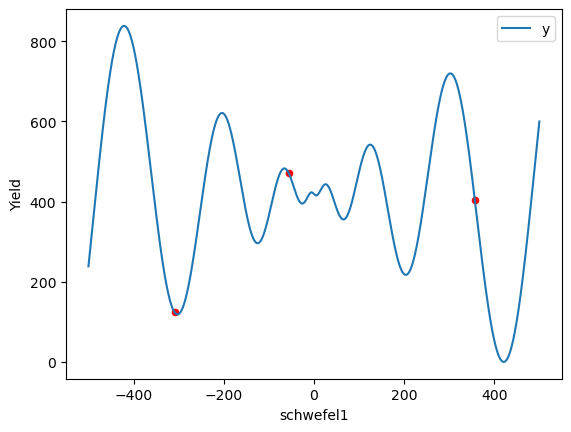

In [98]:
import numpy as np
import matplotlib.pyplot as plt

example_data = pd.DataFrame(columns = ['x', 'y'])

example_data['x'] =  np.linspace(-500,500,5000)
example_data['y'] = example_data['x'].apply(schwefel_1d)

fig, ax  = plt.subplots()
example_data.plot('x', 'y', ax=ax)
df.plot.scatter('schwefel1', 'Yield', ax=ax, c='red')

In [99]:
# from copy import deepcopy
# df_cumulative = deepcopy(df)
# for iteration in range(5):
#     df = campaign.recommend(batch_size=3)
#     df['Yield'] = df['schwefel1'].apply(schwefel_1d)
#     campaign.add_measurements(df)
#     df_cumulative = pd.concat([df_cumulative, df])
#     fig, ax  = plt.subplots(figsize=(4,3))
#     ax.set_title(f'Iteration {iteration} ({len(df_cumulative)} experiments)')
#     example_data.plot('x', 'y', ax=ax)
#     df_cumulative.plot.scatter('schwefel1', 'Yield', ax=ax, c='red')
#     plt.tight_layout()
#     plt.show()

In [105]:
from baybe.simulation import simulate_experiment
from random import randint

results = {}
for noise_level in [0,0.01,0.1,1]:
    eval_eqn = lambda x: schwefel_1d_with_noise(x, noise_level)
    results[noise_level] = {}
    placeholder = {}
    for x in range(20):
        print(x)
        placeholder[x] = simulate_experiment(
            campaign,
            eval_eqn,
            n_doe_iterations = 20,
            random_seed=x
        )
        placeholder_df = pd.DataFrame({k:v['Yield_CumBest'] for k,v in placeholder.items()})
    results[noise_level] = placeholder_df.T.describe().T[['mean', 'std']].reset_index(names='N_exp')



0


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


1
2
3
4
5
6
7
8


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


9
10
11
12
13
14
15
16
17
18


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


19


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


0


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


1
2
3
4
5
6
7
8


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


9
10
11
12
13
14
15
16
17
18


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


19


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


0


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


1
2
3
4
5
6
7
8


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


9
10
11
12
13
14
15
16
17
18


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


19


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


0


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


1
2
3
4
5
6
7
8


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


9
10
11


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


12
13
14
15
16
17
18
19


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\botorch\optim\initializers.py:432: BadInitialCandidatesWarning: Unable to find non-zero acquisition function values - initial conditions are being selected randomly.
  warnings.warn(


c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\seaborn\_old

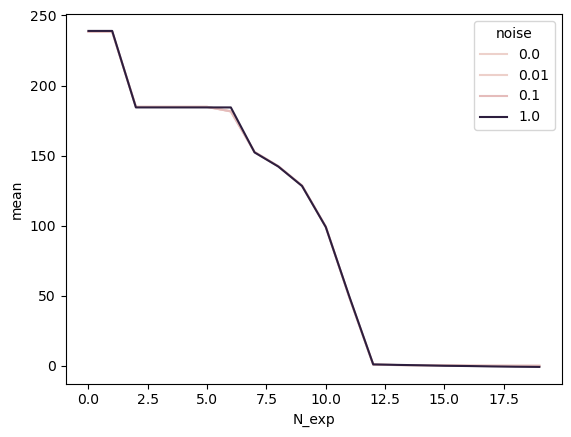

In [121]:
results_df = pd.DataFrame()
for k,v in results.items():
    v['noise'] = k
    results_df = pd.concat([results_df, v])
ax = sns.lineplot(data=results_df, x='N_exp', y='mean', hue='noise')

ValueError: Could not interpret value `N_exp` for parameter `x`

In [ ]:
ax = sns.lineplot(data=result_df, x='N_exp', y='mean', hue=)
ax.fill_between(result_df_ave['N_exp'], result_df_ave['mean']-result_df_ave['std'], result_df_ave['mean']+result_df_ave['std'], alpha=0.2, )
ax.legend()
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cumulative best guess')
ax.set_title('Backtracing 1-dimensional noisy Schwefel function')

c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\d23895jm\AppData\Local\anaconda3\envs\BO\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Backtracing 1-dimensional noisy Schwefel function')

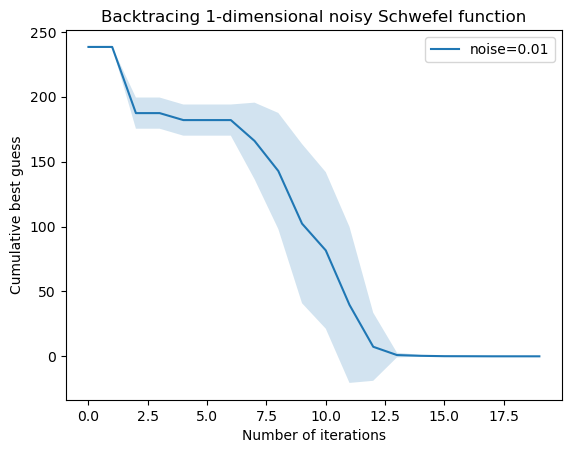

In [101]:
import seaborn as sns
result_df_ave = result_df.T.describe().T[['mean', 'std']].reset_index(names='N_exp')
ax = sns.lineplot(data=result_df_ave, x='N_exp', y='mean', label='noise=0.01')
ax.fill_between(result_df_ave['N_exp'], result_df_ave['mean']-result_df_ave['std'], result_df_ave['mean']+result_df_ave['std'], alpha=0.2, )
ax.legend()
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cumulative best guess')
ax.set_title('Backtracing 1-dimensional noisy Schwefel function')